In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('heart.csv', sep=',')
print(df.head(5))
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

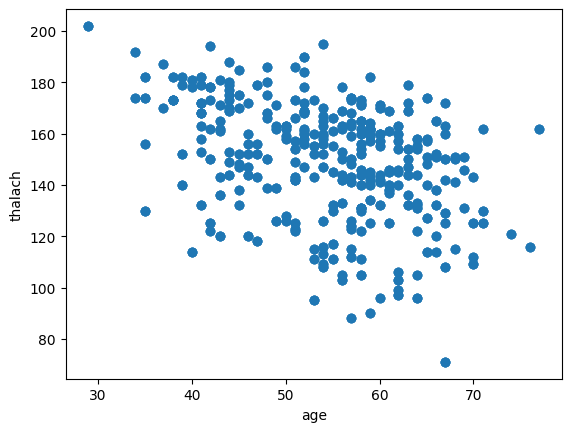

In [26]:
# Диаграмма рассеяния

plt.xlabel('age')
plt.ylabel('thalach')
plt.scatter(x=df['age'], y=df['thalach'])

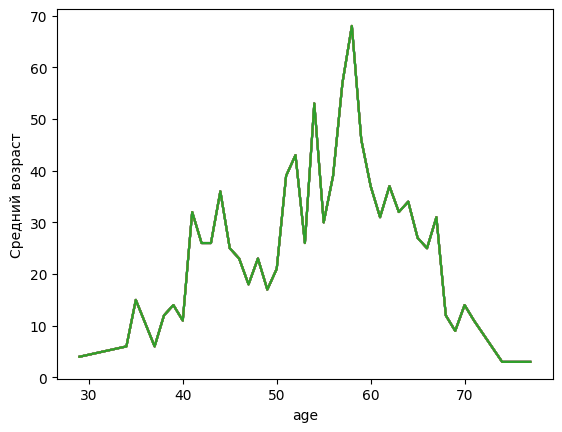

In [27]:
# Линейный гарфик

d = df.groupby(['age']).count()
plt.xlabel('age')
plt.ylabel('Средний возраст')
plt.plot(d.index, d.values)

{'whiskers': [<matplotlib.lines.Line2D at 0x14f4a8882d0>,
 'caps': [<matplotlib.lines.Line2D at 0x14f4b31e190>,
 'boxes': [<matplotlib.patches.PathPatch at 0x14f4b2f5710>],
 'medians': [<matplotlib.lines.Line2D at 0x14f4b31f210>],
 'fliers': [<matplotlib.lines.Line2D at 0x14f4b32c350>],
 'means': [<matplotlib.lines.Line2D at 0x14f4b31fa50>]}

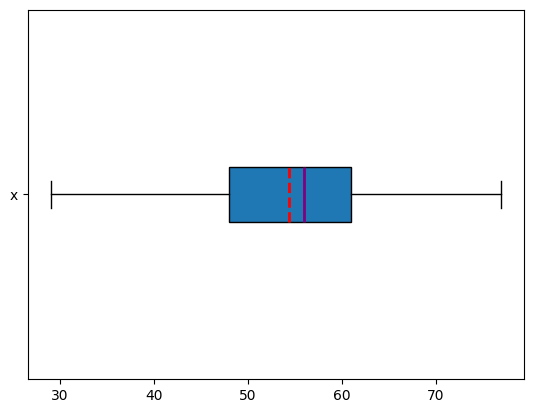

In [28]:
# Ящик с усами

plt.boxplot(x=df['age'], vert=False, showmeans=True, meanline=True,
labels=('x'), patch_artist=True, medianprops={'linewidth': 2, 'color':
'purple'}, meanprops={'linewidth': 2, 'color': 'red'})

(array([0.00081301, 0.00792683, 0.02215447, 0.0254065 , 0.02439024,
        0.04166667, 0.0445122 , 0.03028455, 0.00934959, 0.00182927]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

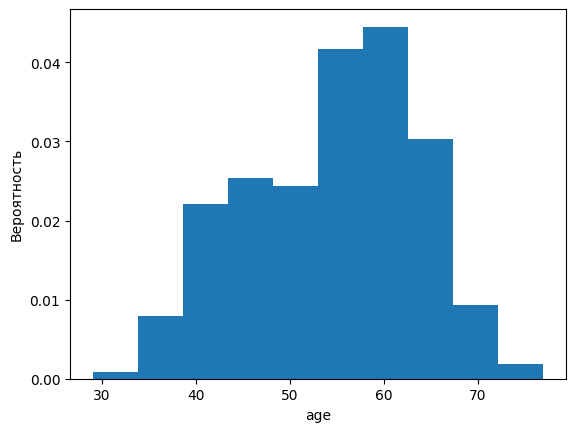

In [29]:
# Гистограмма

plt.xlabel('age')
plt.ylabel('Вероятность')
plt.hist(x=df['age'], bins=10, density=True)

array([<Axes: >], dtype=object)

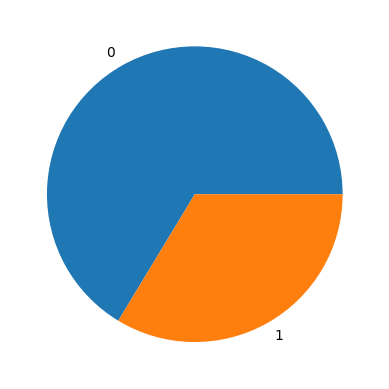

In [30]:
# Круговые диаграммы

d = df.groupby('exang', sort=True).size().sort_values(ascending = False)
#строим график
d.plot(kind='pie', subplots=True)

<BarContainer object of 2 artists>

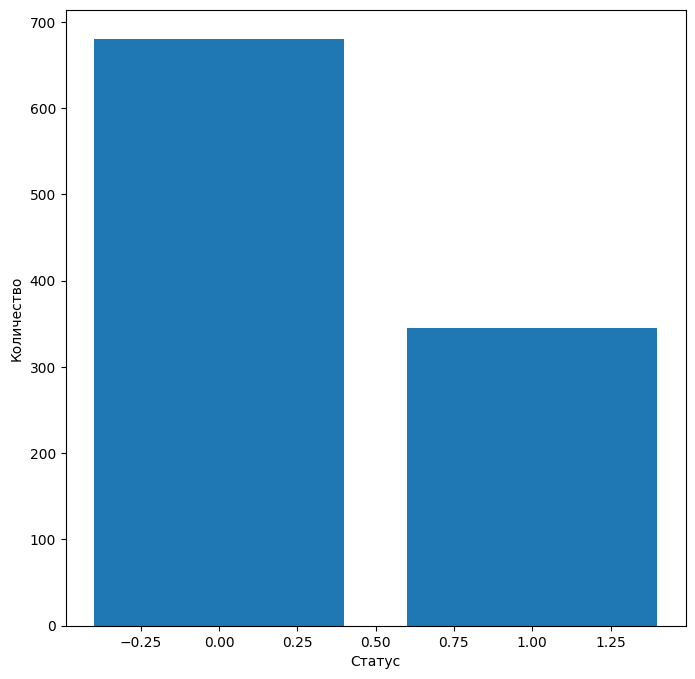

In [31]:
# Барный график

d = df.groupby('exang', sort=True).size().sort_values(ascending = False)
#строим график
plt.figure(figsize=(8,8))
plt.xlabel('Статус')
plt.ylabel('Количество')
plt.bar(d.index, d.values)

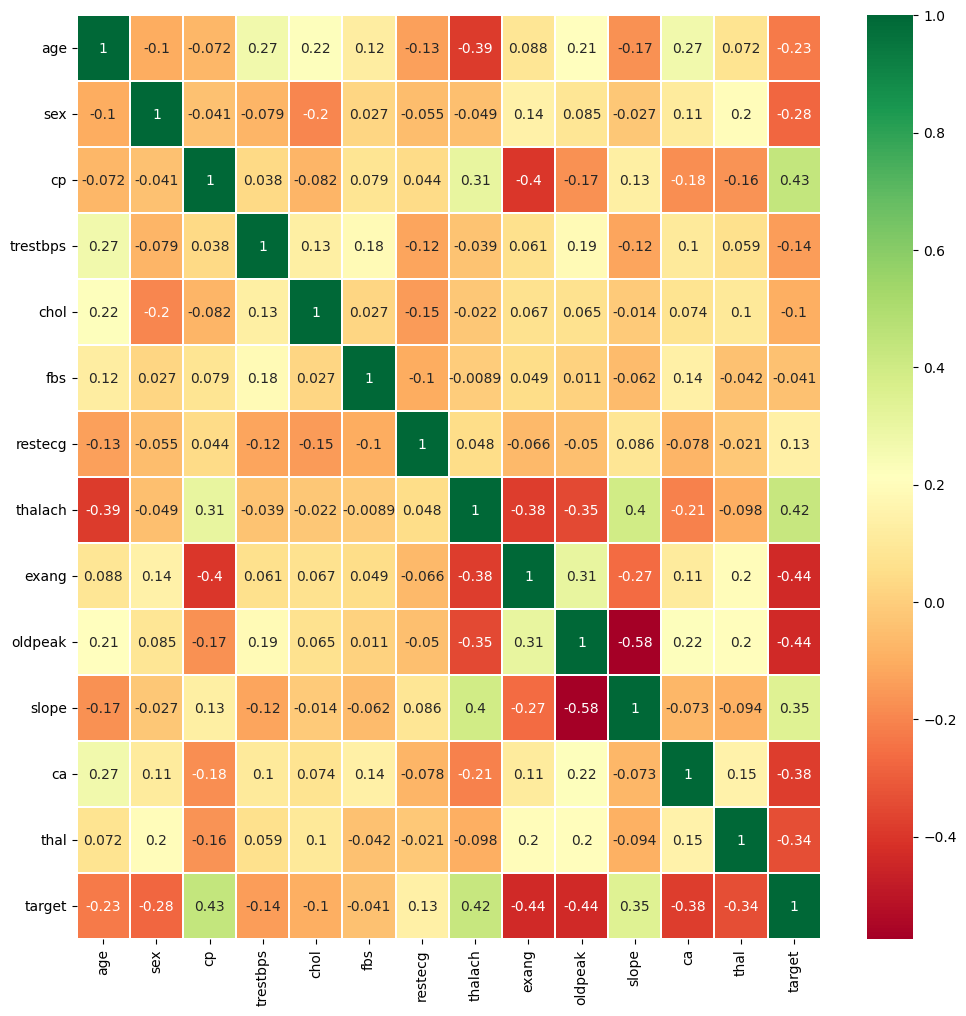

In [32]:
# Матрица корреляций

data = df.iloc[:, :]
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

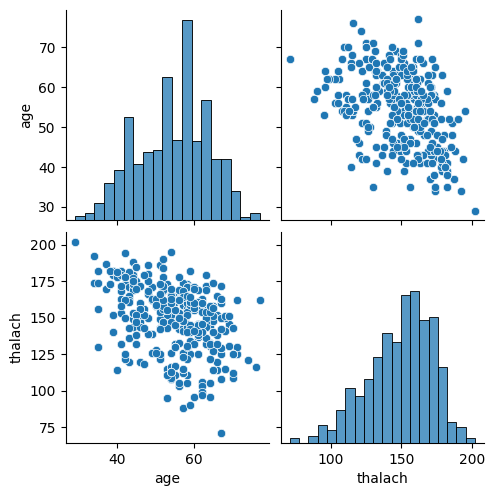

In [33]:
# Парный график

sns_plot = sns.pairplot(df[['age','thalach']])

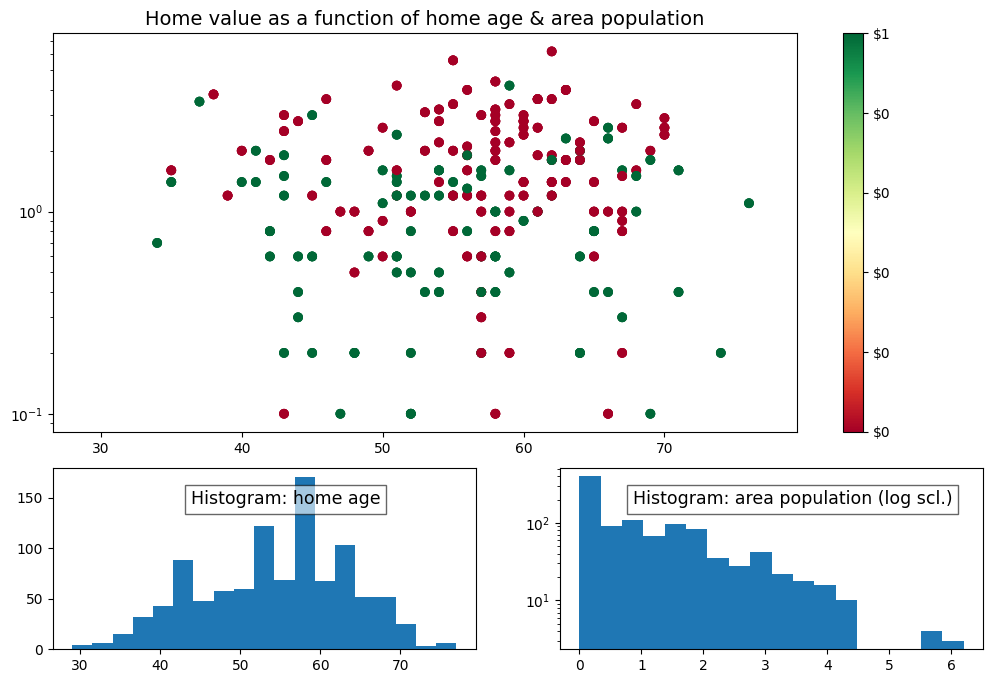

In [34]:
import matplotlib.pyplot as plt #

def add_titlebox(ax, text): # создаем свою вспомогательную функцию для заданного объекта графика и текста
    ax.text(.55, .8, text, # она распологает текстовое окно
        horizontalalignment='center', # с расположением текста по центру
        transform=ax.transAxes, # "оси" для текста
        bbox=dict(facecolor='white', alpha=0.6), # очерчивание текста прямоугольником
        fontsize=12.5) # размер шрифта
    return ax # возращаем измененный объект графика
 
age = df['age'] # 5 и 8 столбцы в отдельные переменные (мы же помним, что индекс и номер отличаются на единичку)\
pop = df['oldpeak']
y = df['target']

gridsize = (3, 2) # размер сетки 
fig = plt.figure(figsize=(12, 8)) # создаем полотно
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2) # первый график будет занимать 4 клетки из сетки
ax2 = plt.subplot2grid(gridsize, (2, 0)) # а эти по одной
ax3 = plt.subplot2grid(gridsize, (2, 1)) #
ax1.set_title( # название первого графика
    'Home value as a function of home age & area population',
    fontsize=14 # размер шрифта
)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn') # строим дискретное распределение, зависимость стоимости от возраста и населенности, стоимость отображается цветом в заданной цветовой карте

plt.colorbar(sctr, ax=ax1, format='$%d') # отображаем цветовую карту со шкалой значений
ax1.set_yscale('log') # логарифмический масштаб

ax2.hist(age, bins='auto') # второй график - гисторамма возрастов
ax3.hist(pop, bins='auto', log=True) # третий график - гистограмма населенности, в логарифмическом масштабе
 
add_titlebox(ax2, 'Histogram: age') # название второго графика
add_titlebox(ax3, 'Histogram: oldpeak') # название третьего графика

plt.show() #

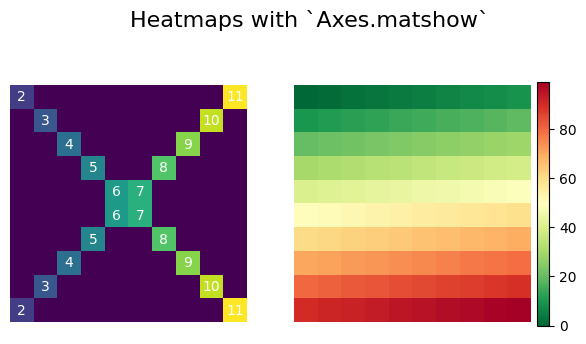

In [1]:
import numpy as np #
import matplotlib.pyplot as plt #
 
x = np.diag(np.arange(2, 12))[::-1] #
x[np.diag_indices_from(x[::-1])] = np.arange(2, 12) #
x2 = np.arange(x.size).reshape(x.shape) #
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4)) #

ax1.matshow(x) #
ax1.axis('off')
img2 = ax2.matshow(x2, cmap='RdYlGn_r') #
ax2.axis('off')
 
for i, j in zip(*x.nonzero()): #
    ax1.text(j, i, x[i, j], color='white', ha='center', va='center') #
 
plt.colorbar(img2, ax=[ax1, ax2], shrink=0.79, pad=0.01)
fig.suptitle('Heatmaps with `Axes.matshow`', fontsize=16) #
 
plt.show() #

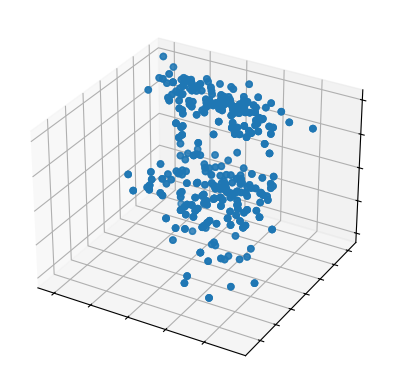

In [36]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(df['age'], df['thalach'], df['slope'])
ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])
plt.show()

In [ ]:
# fig, ax = plt.subplots()
# ax.triplot(df['age'], df['thalach'])
# ax.set(xlim=(0, 80), ylim=(50, 300))
# plt.show()

# fig, ax = plt.subplots()
# ax.plot(df['age'], df['thalach'], 'o', markersize=2, color='grey')
# ax.tricontourf(df['age'], df['thalach'], df['slope'])
# ax.set(xlim=(0, 80), ylim=(50, 300))
# plt.show()

# fig, ax = plt.subplots()
# ax.plot(df['age'], df['thalach'], 'o', markersize=2, color='lightgrey')
# ax.tricontour(df['age'], df['thalach'], df['slope'])
# ax.set(xlim=(0, 80), ylim=(50, 300))
# plt.show()